In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/source_data.csv')

In [17]:
df.head()

,objectid,bicycles_raw,bicycles_qcd,bicycles,qa_difference
datetime,,,,,
2019-01-01 00:00:00,1,0,0.0,0.0,0.0
2019-01-01 01:00:00,2,0,0.0,0.0,0.0
2019-01-01 02:00:00,3,0,0.0,0.0,0.0
2019-01-01 03:00:00,4,0,0.0,0.0,0.0
2019-01-01 04:00:00,5,0,0.0,0.0,0.0


In [5]:
df['bicycles'] = df['bicycles_qcd'].fillna(df['bicycles_raw'])

In [7]:
df['datetime'] = pd.to_datetime(df['date_'] + ' ' + df['hour'].str[:2] + ':00:00')

In [9]:
df.set_index('datetime', inplace=True)

In [10]:
df.drop(['date_', 'hour'], axis=1, inplace=True)

In [16]:
df['qa_difference'] = df['bicycles_raw'] - df['bicycles_qcd']
df['qa_difference'] = df['qa_difference'].fillna(0)
df['bicycles_qcd'] = df['bicycles_qcd'].fillna(0)

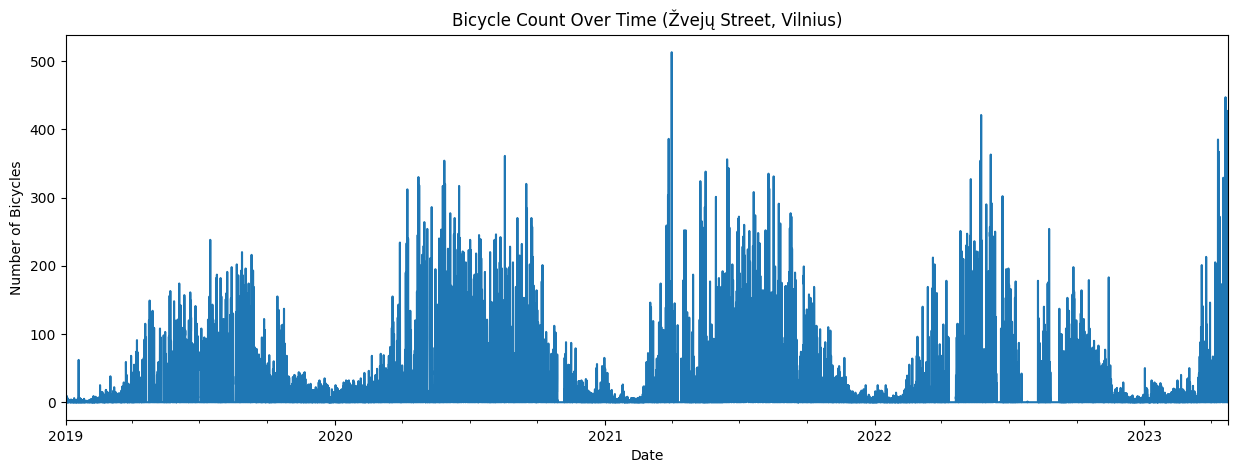

In [19]:
df['bicycles'].plot(figsize=(15,5))
plt.title('Bicycle Count Over Time (Žvejų Street, Vilnius)')
plt.xlabel('Date')
plt.ylabel('Number of Bicycles')
plt.show()

In [20]:
df.to_csv('../data/bike_data_cleaned.csv')